<a href="https://colab.research.google.com/github/AnjaliAM/Artifical-Neural-Networks/blob/main/ANN_implementation_using_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple classifier using keras's Sequential API

* It's a dataset of handwritten digits
8 each dataoint is 2d array of 28x28
* It has 10 clases 0-9
* aka hello world for ANN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [ ]:
mnist= tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape,X_train_full.dtype   # unint = unsigned integer whose value lies b/w 0 to 255

((60000, 28, 28), dtype('uint8'))

In [ ]:
y_train_full.shape,y_train_full.dtype

((60000,), dtype('uint8'))

In [ ]:
X_test.shape,X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_valid , X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255
          

 

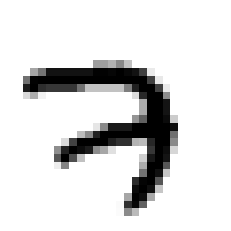

7

In [ ]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()
y_train[0]
       

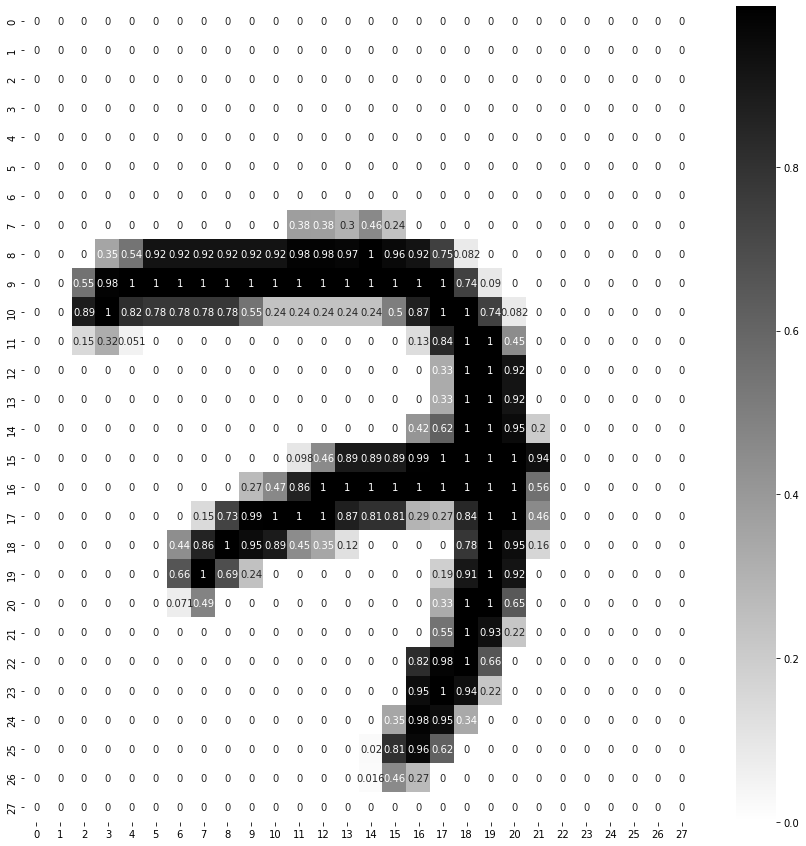

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot = True, cmap= "binary")

In [ ]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputLayer"),

]
 

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*300+300 , 300 * 100 + 100, 100 * 10 + 10

(235500, 30100, 1010)

In [ ]:
sum([784*300+300 , 300 * 100 + 100, 100 * 10 + 10])

266610

In [ ]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [ ]:
hidden1.get_weights()

[array([[-0.06795959,  0.04399529,  0.0676935 , ...,  0.06999397,
          0.06621644,  0.06052345],
        [ 0.03053384,  0.06489314, -0.04970645, ...,  0.02644999,
         -0.07428603,  0.04409916],
        [ 0.02347007,  0.01688424, -0.05076686, ..., -0.06774752,
          0.06346732,  0.02121857],
        ...,
        [-0.01889817, -0.0028173 , -0.04986751, ...,  0.06320785,
          0.00092538, -0.06670401],
        [ 0.04834161,  0.04425509,  0.03880312, ..., -0.00480817,
         -0.01029494, -0.00461409],
        [-0.0304592 ,  0.01617146, -0.01537606, ...,  0.00425909,
          0.02864058,  0.05684227]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights,biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

loss_function (actual, predicted) = eror


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]
model.compile(loss= LOSS_FUNCTION,
              optimizer = OPTIMIZER,
              metrics = METRICS)

*IMPORTANT-
* **EPOCHS:** Integer
Number of epochs to train the model.An epochs is an iteraion over the entire x and y data proided.
**Batch size:** Integer or None.
Number of samples per gradient update. If unspecified,  batch_size will default to 32.
NOTE: DO NOT specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances(since they generate batches).
**Validation_batch_size ** : Integer or None.
Number of samples per validation bathc.
If unspecified, will default to batch_size.
NOTE: Do not specfy the validation_batch_size if your data is in the form of datasets, generators,or keras.utils.Sequence instances(since they generate batches).


In [ ]:
EPOCHS =30
VALIDATION_SET =(X_valid, y_valid)

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data = VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 9s 3ms/step - loss: 0.6152 - accuracy: 0.8404 - val_loss: 0.3043 - val_accuracy: 0.9178
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.9178 - val_loss: 0.2395 - val_accuracy: 0.9326
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2359 - accuracy: 0.9329 - val_loss: 0.2064 - val_accuracy: 0.9422
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2018 - accuracy: 0.9421 - val_loss: 0.1869 - val_accuracy: 0.9478
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1766 - accuracy: 0.9491 - val_loss: 0.1653 - val_accuracy: 0.9546
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1566 - accuracy: 0.9551 - val_loss: 0.1458 - val_accuracy: 0.9584
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1400 - accuracy: 0.9603 - val_loss: 0.1356 - val_accuracy:

In [ ]:
55000/32

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.save("model.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("model.h5")

In [ ]:
loaded_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9796


[0.07061708718538284, 0.9796000123023987]

In [ ]:
history

In [ ]:
history.history

{'loss': [0.6152418255805969,
  0.2866286337375641,
  0.2359287589788437,
  0.20180077850818634,
  0.17655837535858154,
  0.15655188262462616,
  0.13998833298683167,
  0.12632526457309723,
  0.11528588086366653,
  0.10494877398014069,
  0.09656494110822678,
  0.0889098271727562,
  0.08236465603113174,
  0.0764831155538559,
  0.07113979011774063,
  0.06657230854034424,
  0.06194435805082321,
  0.05789637938141823,
  0.05411157384514809,
  0.05110413581132889,
  0.048164963722229004,
  0.044981032609939575,
  0.042254429310560226,
  0.039618898183107376,
  0.03759998828172684,
  0.03523171693086624,
  0.0333278626203537,
  0.03131451457738876,
  0.029625963419675827,
  0.027976373210549355],
 'accuracy': [0.840399980545044,
  0.9177818298339844,
  0.9328545331954956,
  0.9421091079711914,
  0.9491454362869263,
  0.9550908803939819,
  0.9602909088134766,
  0.9643818140029907,
  0.9680545330047607,
  0.9706727266311646,
  0.9732909202575684,
  0.975490927696228,
  0.9768727421760559,
  0.9

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.615242,0.840400,0.304279,0.9178
1,0.286629,0.917782,0.239453,0.9326
2,0.235929,0.932855,0.206418,0.9422
3,0.201801,0.942109,0.186854,0.9478
4,0.176558,0.949145,0.165275,0.9546
5,0.156552,0.955091,0.145843,0.9584
6,0.139988,0.960291,0.135645,0.9622
7,0.126325,0.964382,0.124651,0.9654
8,0.115286,0.968055,0.120567,0.9658
9,0.104949,0.970673,0.110293,0.9702


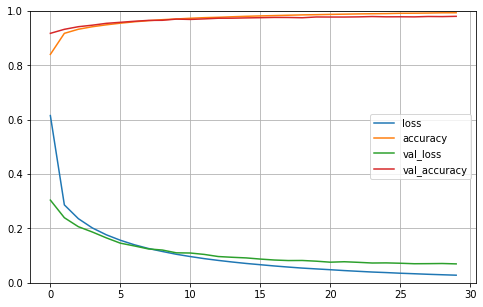

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
X_new = X_test[:3]
y_new = y_test[:3]

y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 69ms/step


array([[7.7608647e-06, 4.1941178e-08, 3.1302145e-04, 4.5661064e-04,
        3.9149665e-08, 3.9698170e-06, 2.4817835e-11, 9.9916673e-01,
        2.3423163e-05, 2.8346811e-05],
       [3.5008588e-07, 5.0790736e-04, 9.9940908e-01, 7.0627837e-05,
        6.3269390e-11, 5.7205875e-07, 8.9373234e-06, 2.4207348e-12,
        2.5119962e-06, 2.5059406e-13],
       [4.6584173e-06, 9.9832636e-01, 1.9367589e-04, 3.6476758e-05,
        1.0672222e-04, 9.4360395e-05, 8.0488739e-05, 2.8596484e-04,
        8.5294194e-04, 1.8343222e-05]], dtype=float32)

In [ ]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis = -1)
y_pred,y_new


(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

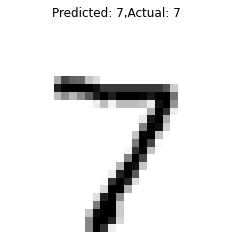

------------------------------------------------------------


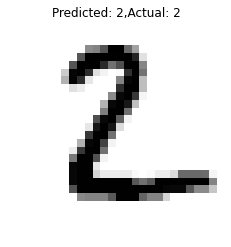

------------------------------------------------------------


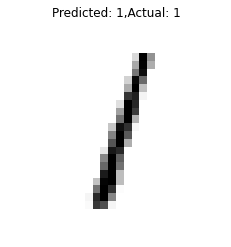

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new,y_pred, y_new):
  plt.imshow(data,cmap="binary")
  plt.title(f"Predicted: {pred},Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)